In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats
from collections import Counter
from scipy.stats import mannwhitneyu

# Objective
This notebook plots violin plots for MJO LPT volumetric rainfall data

## DJFM All MJO LPT Times
This just plots all the times available irrespective of max 

In [2]:
non_mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/DJFM_MJO_LPT_Vol_Rain_MJO_Active.csv')
non_mjo_og = non_mjo_og.drop(columns=['Unnamed: 0'])

mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/DJFM_MJO_LPT_Vol_Rain_MJO_Conn.csv')
mjo_og = mjo_og.drop(columns=['Unnamed: 0'])

In [8]:
#drop the zeroes since they're not really helpful and only reflect times when there's no MJO LPT present

non_mjo_og = non_mjo_og[non_mjo_og['Volumetric Rain'] != 0].reset_index()
mjo_og = mjo_og[mjo_og['Volumetric Rain'] != 0].reset_index()

In [13]:
non_mjo_erm = np.array(non_mjo_og['Volumetric Rain'])/1000000 #for the conversion factor
mjo_erm = np.array(mjo_og['Volumetric Rain'])/1000000

In [14]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

192.11945297153179
651.816
0.50731509375
188.969768


In [15]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

235.9153361378704
653.946816
3.7750035
240.046608


In [16]:
print(len(non_mjo_erm))
print(len(mjo_erm))

33420
14646


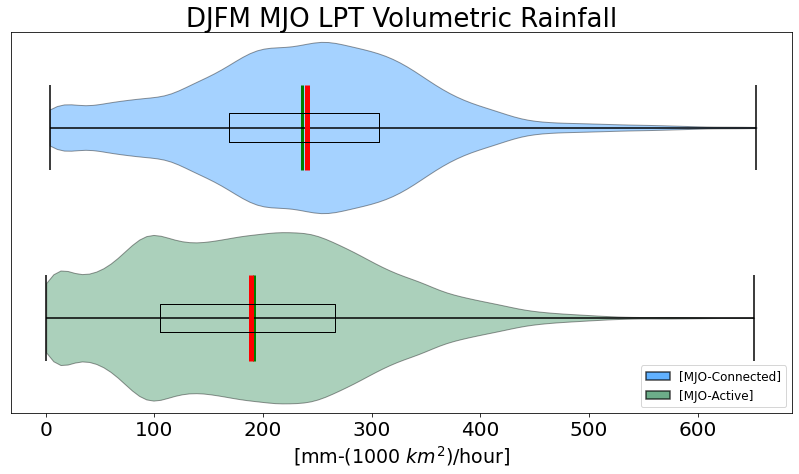

In [20]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_erm]
type_labels = ['[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('DJFM MJO LPT Volumetric Rainfall', fontsize=titlesize)
ax.set_xlabel('[mm-(1000 $km^{2}$)/hour]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/MJO_Vol_Rain/DJFM_Vol_Rain.png", dpi=350, bbox_inches='tight')
plt.show()

In [18]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)

stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

0.0
1.9519711879585164e-30


/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [19]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu


stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons

# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)

# they seem different, but maybe there's an issue with statistical tests with such a large N

0.0
0.0


## DJFM Max MJO LPT Vol Rain

In [21]:
non_mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/MJO_Max_Rain_MJO_Active_ARs.csv')
non_mjo_og = non_mjo_og.drop(columns=['Unnamed: 0'])

mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/MJO_Max_Rain_MJO_Connected_ARs.csv')
mjo_og = mjo_og.drop(columns=['Unnamed: 0'])

In [22]:
mjo_og

,AR ID (string),Landfall Datetime,Max ERM,Max IVT,Max MJO LPT Vol. Rain,End Season Year,Month,AR ID (Number)
0,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2000-07-27T01:00:00,0.589710,1595.32150,343886528.0,2000,7,77.2
1,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2000-07-28T00:00:00,0.496578,1691.76640,0.0,2000,8,77.7
2,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2000-10-16T19:00:00,0.948061,1037.16550,159163536.0,2000,10,297.3
3,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2000-10-19T19:00:00,1.402869,1423.64220,96953920.0,2000,10,297.4
4,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2000-11-27T00:00:00,0.724922,916.03796,124232896.0,2000,11,410.3
...,...,...,...,...,...,...,...,...
252,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2022-01-20T08:00:00,1.020551,2158.68680,403855136.0,2021,1,373.3
253,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2022-01-24T10:00:00,0.639169,1447.13000,352408736.0,2021,1,393.3
254,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2022-10-30T06:00:00,1.800382,2192.27540,332948608.0,2022,10,281.1
255,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2023-02-10T01:00:00,0.573124,1833.31200,395080160.0,2022,2,465.1


In [30]:
#mjo active

dec=non_mjo_og[non_mjo_og['Month'] == 12]
jan=non_mjo_og[non_mjo_og['Month'] == 1]
feb=non_mjo_og[non_mjo_og['Month'] == 2]
mar=non_mjo_og[non_mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

non_mjo_erm = np.array(CA_non_DJF['Max MJO LPT Vol. Rain'])/1000000 #for the conversion factor

In [31]:
#mjo active

dec=mjo_og[mjo_og['Month'] == 12]
jan=mjo_og[mjo_og['Month'] == 1]
feb=mjo_og[mjo_og['Month'] == 2]
mar=mjo_og[mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_erm = np.array(CA_non_DJF['Max MJO LPT Vol. Rain'])/1000000 #for the conversion factor

In [32]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

263.04695121587304
651.816
3.0840705
275.29504


In [33]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

328.17287225714284
653.946816
9.026667
341.544032


In [34]:
print(len(non_mjo_erm))
print(len(mjo_erm))

315
105


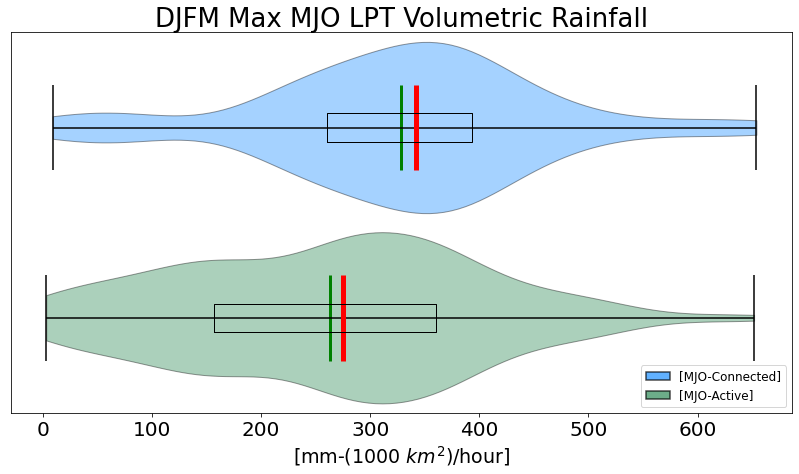

In [35]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_erm]
type_labels = ['[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('DJFM Max MJO LPT Volumetric Rainfall', fontsize=titlesize)
ax.set_xlabel('[mm-(1000 $km^{2}$)/hour]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/MJO_Vol_Rain/DJFM_Max_Vol_Rain.png", dpi=350, bbox_inches='tight')
plt.show()

In [36]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)

stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

0.0022857156582176685
0.0019198179943487048


In [37]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu


stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons

# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)

# tyeah definitely the MJO-Connected ARs have more volumentric rainfall

1.428314174862591e-05
7.141570874312955e-06
